In [47]:
import numpy as np
import pandas as pd
import seaborn as sns


In [48]:
df = pd.read_csv("poly.csv")
df.head()

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sno          6 non-null      int64  
 1   Temperature  6 non-null      int64  
 2   Pressure     6 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 276.0 bytes


In [50]:
df.isnull().sum()

sno            0
Temperature    0
Pressure       0
dtype: int64

In [51]:
x=df.iloc[:,0:1]
y=df.iloc[:,-1]
y

0    0.0002
1    0.0012
2    0.0060
3    0.0300
4    0.0900
5    0.2700
Name: Pressure, dtype: float64

In [52]:
df.drop(columns=["sno"], inplace=True)
df

,Temperature,Pressure
0,0,0.0002
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900
5,100,0.2700


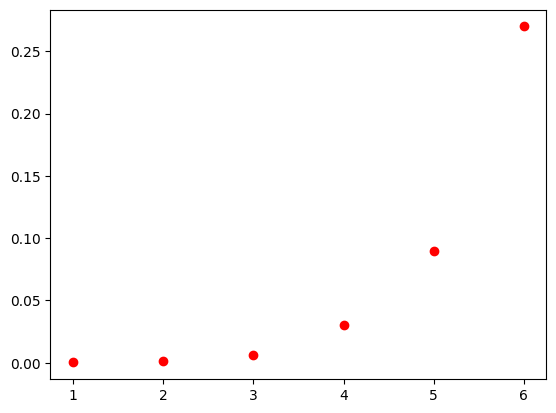

In [53]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color="red")

In [54]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)
y_pred

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

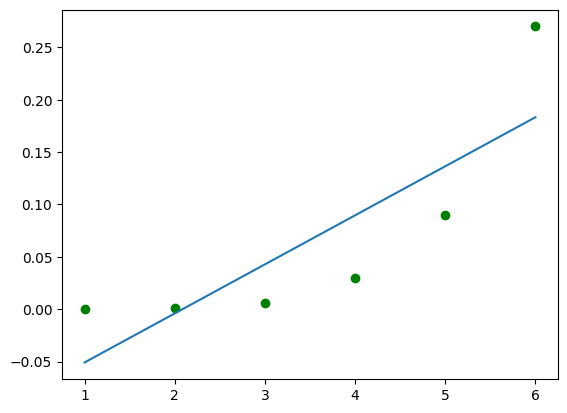

In [55]:
plt.scatter(x,y,color="g")
plt.plot(x,y_pred)

In [56]:
df.corr(numeric_only = True)

,Temperature,Pressure
Temperature,1.000000,0.830873
Pressure,0.830873,1.000000


In [57]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
print(mean_absolute_percentage_error(y,y_pred))

44.775078189300444


In [58]:
print(r2_score(y,y_pred))

0.690349972603981


In [59]:
# polinomial model
# degree=2

from sklearn.preprocessing import  PolynomialFeatures
feature = PolynomialFeatures(degree=3)
x_poly = feature.fit_transform(x)
x_poly

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.],
       [  1.,   6.,  36., 216.]])

In [60]:
x_poly.shape

(6, 4)

In [61]:
model1=LinearRegression()
model1.fit(x_poly,y)
y_poly = model1.predict(x_poly)
y_poly

array([-0.00198889,  0.00724444,  0.00371111,  0.02248889,  0.09865556,
        0.26728889])

In [62]:
y

0    0.0002
1    0.0012
2    0.0060
3    0.0300
4    0.0900
5    0.2700
Name: Pressure, dtype: float64

In [63]:
mape1 = mean_absolute_percentage_error(y,y_poly)
mape1

2.786591220851445

In [65]:
score = r2_score(y,y_poly)
score

0.9966691251761721

In [68]:
df1=pd.DataFrame({"Actual_value": y,"simple_reg":y_pred,"poly_reg":y_poly})
df1

,Actual_value,simple_reg,poly_reg
0,0.0002,-0.050867,-0.001989
1,0.0012,-0.004027,0.007244
2,0.0060,0.042813,0.003711
3,0.0300,0.089653,0.022489
4,0.0900,0.136493,0.098656
5,0.2700,0.183333,0.267289


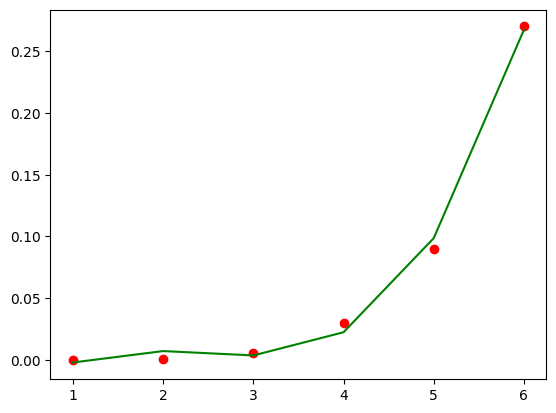

In [69]:
plt.scatter(x,y,color="r")
plt.plot(x,y_poly,color="g")